###PART 1
####Problem Statement: School with higher attendance rate SHOULD have a higher SAT Score
#####NULL HYPOTHESIS: SAT Scores of  Students in NYC School District(1-32)  has NO Correlation to Attendance % of Students in NYC School District(1-32)
#####ALTERNATE HYPOTHESIS: SAT Scores of  Students in NYC School District(1-32)  has POSITIVE Correlation to Attendance % of Students in NYC School District(1-32)

In [1]:
#Importing Packages
import csv
import urllib2
import os
import pandas as pd
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

# IMPORTING THE FILE FOR SAT SCORES FOR 2012
SAT = pd.read_csv("https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD")


Populating the interactive namespace from numpy and matplotlib


In [2]:
SAT.info()
SAT
# SAT_Score[SAT_Score['SAT Critical Reading Avg. Score'] == 's']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 26.1+ KB


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


##### The missing data in file are noted as 's' so in order to use NaN funtions to remove missing values, I converted s to NaN and then created a new data frame by removing rows with missing data frame. 

In [3]:
SAT.replace('s','NaN', inplace=True, regex=True)
SATScore = SAT.dropna()

In [4]:
# Extracting the District Number from DBN Column and Putting it in a new column
SATScore['District'] = SATScore['DBN'].map(lambda x: str(x)[:2])

#Converting scores/number from object to numbers for computation
SATScore['District'] = (SATScore['District']).astype(float)
SATScore['Num_test_taker'] = (SATScore['Num of SAT Test Takers']).astype(float)
SATScore['SAT_avg_reading'] = (SATScore['SAT Critical Reading Avg. Score']).astype(float)
SATScore['SAT_avg_writing'] = (SATScore['SAT Writing Avg. Score']).astype(float)
SATScore['SAT_avg_math'] = (SATScore['SAT Math Avg. Score']).astype(float)

SATScore.info()
SATScore.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 11 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
District                           478 non-null float64
Num_test_taker                     421 non-null float64
SAT_avg_reading                    421 non-null float64
SAT_avg_writing                    421 non-null float64
SAT_avg_math                       421 non-null float64
dtypes: float64(5), object(6)
memory usage: 44.8+ KB


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,District,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1,29,355,363,404
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1,91,383,366,423
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1,70,377,370,402


In [5]:
#Sorting the data by district
SAT_Score = SATScore.groupby('District').mean()
SAT_Score.head(3)

,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math
District,,,,
1,73.333333,423.777778,413.555556,468.444444
2,106.465517,424.068966,419.448276,441.344828
3,108.769231,424.846154,417.076923,426.000000


In [6]:
#District is my index so I need to reset index to make district a regular column
SAT_Score = SAT_Score.reset_index()
SAT_Score.head(3)

,District,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math
0,1,73.333333,423.777778,413.555556,468.444444
1,2,106.465517,424.068966,419.448276,441.344828
2,3,108.769231,424.846154,417.076923,426.000000


In [7]:
#Taking the first 32 School District
SAT_Score_32 = SAT_Score [0:32]

In [8]:
#For analysis I need the total SAT Score per district
SAT_Score_32['Total_Score'] = pd.DataFrame(SAT_Score_32['SAT_avg_reading'] + 
                                           SAT_Score_32['SAT_avg_writing'] +
                                           SAT_Score_32['SAT_avg_math'])

C:\Users\Anita_2\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
SAT_Score_32.head(3)

,District,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math,Total_Score
0,1,73.333333,423.777778,413.555556,468.444444,1305.777778
1,2,106.465517,424.068966,419.448276,441.344828,1284.862069
2,3,108.769231,424.846154,417.076923,426.000000,1267.923077


In [10]:
# IMPORTING THE FILE FOR ATTENDANCE IN ALL SCHOOL
attendance = pd.read_csv("https://data.cityofnewyork.us/api/views/rfpq-hs49/rows.csv?accessType=DOWNLOAD")
attendance.info()
attendance.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 3 columns):
District                  35 non-null object
YTD % Attendance (Avg)    35 non-null object
YTD Enrollment (Avg)      35 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


,District,YTD % Attendance (Avg),YTD Enrollment (Avg)
0,DISTRICT 01,91.18%,12367
1,DISTRICT 02,89.01%,60823
2,DISTRICT 03,89.28%,21962


In [11]:
# Extracting the District Number from District Column to make it numeric
attendance['District'] = attendance['District'].map(lambda x: str(x)[-2:])
attendance.info()
attendance.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 3 columns):
District                  35 non-null object
YTD % Attendance (Avg)    35 non-null object
YTD Enrollment (Avg)      35 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


,District,YTD % Attendance (Avg),YTD Enrollment (Avg)
0,01,91.18%,12367
1,02,89.01%,60823
2,03,89.28%,21962


In [12]:
#Taking the first 32 School District
attendance_32 = attendance [0:32]

In [13]:
#Converting scores/number from object to numbers for computation
attendance_32['District'] = attendance_32['District'].astype(float)

C:\Users\Anita_2\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [14]:
#type(attendance.iloc[30,1])

In [15]:
# Extracting the Attendance from 'YTD % Attendance (Avg)' and Putting it in a new column
attendance_32['class_attend'] = (attendance_32['YTD % Attendance (Avg)'].map(lambda x:
                                 str(x)[:-1])).astype(float)
attendance_32.info()
attendance_32.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 4 columns):
District                  32 non-null float64
YTD % Attendance (Avg)    32 non-null object
YTD Enrollment (Avg)      32 non-null int64
class_attend              32 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


C:\Users\Anita_2\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,District,YTD % Attendance (Avg),YTD Enrollment (Avg),class_attend
0,1,91.18%,12367,91.18
1,2,89.01%,60823,89.01
2,3,89.28%,21962,89.28


In [16]:
# attendance
# type(attendance.iloc[30,3])

In [17]:
#MERGING THE DATA SETS FOR DOING REGRESSION ANALYSIS
SAT_vs_attend = pd.merge(SAT_Score_32, attendance_32, how='inner', on='District')
SAT_vs_attend.columns
SAT_vs_attend.info()
SAT_vs_attend.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 9 columns):
District                  32 non-null float64
Num_test_taker            32 non-null float64
SAT_avg_reading           32 non-null float64
SAT_avg_writing           32 non-null float64
SAT_avg_math              32 non-null float64
Total_Score               32 non-null float64
YTD % Attendance (Avg)    32 non-null object
YTD Enrollment (Avg)      32 non-null int64
class_attend              32 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.5+ KB


,District,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math,Total_Score,YTD % Attendance (Avg),YTD Enrollment (Avg),class_attend
0,1,73.333333,423.777778,413.555556,468.444444,1305.777778,91.18%,12367,91.18
1,2,106.465517,424.068966,419.448276,441.344828,1284.862069,89.01%,60823,89.01
2,3,108.769231,424.846154,417.076923,426.000000,1267.923077,89.28%,21962,89.28


In [18]:
#Setting X and Y variables
cls_atnd = SAT_vs_attend['class_attend']
tot_score = SAT_vs_attend['Total_Score']

# Generating 1-degree linear regression model 
model1 = smf.ols(formula='(tot_score) ~ (cls_atnd) ' , data= SAT_vs_attend).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tot_score   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     32.45
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           3.26e-06
Time:                        14:13:33   Log-Likelihood:                -177.31
No. Observations:                  32   AIC:                             358.6
Df Residuals:                      30   BIC:                             361.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1757.6069    520.770     -3.375      0.002     -2821.161  -694.053
cls_atnd      32.9504      5.784      5.697      0.000        21.138    44.763
==============================================================================
Omnibus:                        2.444   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.326
Skew:                           0.129   Prob(JB):                        0.515
Kurtosis:                       2.037   Cond. No.                     4.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 1st degree linear regression is 0.520, The model is predicting the real data at 52%. 

For 1% increase in attendance rate the SAT score increase by 32units. The P>|t| is less than 0.05 therefore we can reject the hypothesis that the two values are not coorelated. 


In [19]:
# Generating 2-degree linear regression model
model2 = smf.ols(formula='(tot_score) ~ (cls_atnd) + I(cls_atnd**2)', data= SAT_vs_attend).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tot_score   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     16.42
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           1.70e-05
Time:                        14:13:40   Log-Likelihood:                -176.92
No. Observations:                  32   AIC:                             359.8
Df Residuals:                      29   BIC:                             364.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         1.605e+04   2.11e+04      0.760      0.454     -2.72e+04  5.93e+04
cls_atnd          -364.2256    471.203     -0.773      0.446     -1327.944   599.493
I(cls_atnd ** 2)     2.2137      2.626      0.843      0.406        -3.157     7.585
==============================================================================
Omnibus:                        1.258   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.054
Skew:                           0.227   Prob(JB):                        0.590
Kurtosis:                       2.236   Cond. No.                     1.52e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 2nd degree linear regression is 0.531, The model is predicting the real data at 53.1%.

Since the R-squared value is very similar for 1st Degree and 2nd Degree we cannot predict which model is a better, we will try visual Inspection. 

In [20]:
# Using limit values for linspace function
lower1 = np.min(cls_atnd)
upper1 = np.max(cls_atnd)
print lower1 , upper1

# Genrating dummy X values
x_dummy = pd.DataFrame({'cls_atnd': np.linspace(lower1, upper1, 100)})

# Generating fitting line for the above model1 
predicted_model1 = model1.predict(x_dummy)
# Generating fitting line for the above model2 
predicted_model2 = model2.predict(x_dummy)

85.55 93.34


(1050, 1400)

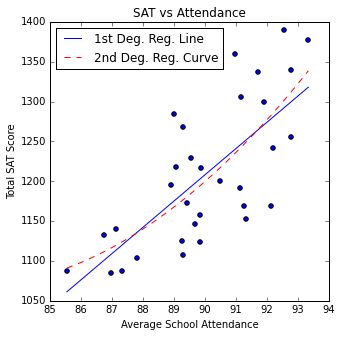

In [21]:
pl.figure(figsize=(5, 5))
pl.title('SAT vs Attendance')
pl.xlabel('Average School Attendance')
pl.ylabel('Total SAT Score')
pl.scatter(cls_atnd,tot_score)
pl.plot(x_dummy, predicted_model1, 'b', label="1st Deg. Reg. Line", linestyle='-')
pl.plot(x_dummy,predicted_model2, 'r', linestyle='--', label = "2nd Deg. Reg. Curve")
pl.legend(loc="upper left")
pl.xlim(int(lower1) , int(upper1+1))
pl.ylim(1050,1400)




By looking at the graph it cannot be predicted which model is a better fit, so we will try likehood ratio test. 

For that likelihood ratio test null hypothesis is that the linear model(Model 1) is a better fit than the curve model(Model 2)

Although I see a few outliers above score of 1350 I decided not to remove them as they would not affect my results much. 

In [22]:
#LIKELIHOOD RATIO TEST 
model2.compare_lr_test(model1)

(0.77464072476755064, 0.37878522469345477, 1.0)

Since the ratio we have gotten (0.77) is lower than the chi square value (3.84 for a significance level of 0.05) we can accept the null hypothesis. Therefore, Line model is better than curve model. 


###PART 2
####Problem Statement: School with Lower Pupil to Teacher Ratio SHOULD have a Higher SAT Score , since it indicates tecahers can give more attention to indiviual student. 
#####NULL HYPOTHESIS: SAT Scores of Students in NYC School District(1-32) has NO Correlation to Pupil to Teacher Ratio in NYC School District(1-32)
#####ALTERNATE HYPOTHESIS: SAT Scores of Students in NYC School District(1-32) has Correlation to Pupil to Teacher Ratio in NYC School District(1-32)

In [23]:
# IMPORTING THE FILE WITH PUPIL TO TEACHER RATIO INFORMATION
RATIO = pd.read_csv("https://data.cityofnewyork.us/api/views/urz7-pzb3/rows.csv?accessType=DOWNLOAD")
RATIO.info()
RATIO.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27611 entries, 0 to 27610
Data columns (total 16 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1,19,19,19,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1,21,21,21,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1,17,17,17,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1,17,17,17,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1,15,15,15,ATS,NaN


In [28]:
# CSD contrains the district number so chaging the column name CSD to District
RATIO.rename(columns={'CSD' : 'District'}, inplace=True)
RATIO.info()
RATIO

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27611 entries, 0 to 27610
Data columns (total 16 columns):
District                                27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

,District,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1,19.0,19,19,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1,21.0,21,21,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1,17.0,17,17,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1,17.0,17,17,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1,15.0,15,15,ATS,NaN
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17,1,17.0,17,17,ATS,NaN
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12,1,12.0,12,12,ATS,NaN
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15,1,15.0,15,15,ATS,NaN
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26,2,13.0,12,14,ATS,NaN
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27,1,27.0,27,27,ATS,NaN


In [29]:
#SORTING DATA SET BY DISTRICT
RATIO_sort = RATIO.groupby(['District']).mean()
RATIO_sort = RATIO_sort.reset_index()
RATIO_sort

,District,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,57.533719,2.672447,20.774759,19.042389,22.418112,12.319355
1,2,107.259830,4.220510,23.794368,20.898512,26.222104,14.770874
2,3,84.129252,3.417687,22.614150,20.481633,24.519728,13.810638
3,4,65.478411,2.873921,21.646287,19.861831,23.233161,12.320588
4,5,69.512059,3.066790,22.166048,20.189239,24.031540,12.722581
5,6,98.719225,4.038728,23.358921,20.838174,25.502075,13.417391
6,7,74.523507,3.365947,21.323380,18.838628,23.392630,12.536585
7,8,94.168132,4.061538,21.948681,19.437363,24.026374,13.506000
8,9,83.698082,3.692244,21.638699,19.002502,23.945788,12.862319
9,10,107.463300,4.437037,22.559125,19.771044,24.832997,13.708434


In [30]:
#Converting scores/number from object to numbers for computation
RATIO_sort['District'] = RATIO_sort['District'].astype(float)

In [31]:
#MERGING THE DATA SETS FOR DOING REGRESSION ANALYSIS
SAT_vs_RATIO = pd.merge(SAT_Score_32, RATIO_sort, how='inner', on='District')
SAT_vs_RATIO.columns
SAT_vs_RATIO.info()
SAT_vs_RATIO.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 12 columns):
District                             32 non-null float64
Num_test_taker                       32 non-null float64
SAT_avg_reading                      32 non-null float64
SAT_avg_writing                      32 non-null float64
SAT_avg_math                         32 non-null float64
Total_Score                          32 non-null float64
NUMBER OF STUDENTS / SEATS FILLED    32 non-null float64
NUMBER OF SECTIONS                   32 non-null float64
AVERAGE CLASS SIZE                   32 non-null float64
SIZE OF SMALLEST CLASS               32 non-null float64
SIZE OF LARGEST CLASS                32 non-null float64
SCHOOLWIDE PUPIL-TEACHER RATIO       32 non-null float64
dtypes: float64(12)
memory usage: 3.2 KB


,District,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math,Total_Score,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,73.333333,423.777778,413.555556,468.444444,1305.777778,57.533719,2.672447,20.774759,19.042389,22.418112,12.319355
1,2,106.465517,424.068966,419.448276,441.344828,1284.862069,107.259830,4.220510,23.794368,20.898512,26.222104,14.770874
2,3,108.769231,424.846154,417.076923,426.000000,1267.923077,84.129252,3.417687,22.614150,20.481633,24.519728,13.810638


In [32]:
#Setting X and Y variables
Ratio_Dist = SAT_vs_RATIO['SCHOOLWIDE PUPIL-TEACHER RATIO']
tot_score_ratio = SAT_vs_RATIO['Total_Score']

# Generating 1-degree linear regression model 
model3 = smf.ols(formula='(tot_score_ratio) ~ (Ratio_Dist) ' , data= SAT_vs_RATIO).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_score_ratio   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     16.10
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           0.000369
Time:                        14:14:22   Log-Likelihood:                -182.16
No. Observations:                  32   AIC:                             368.3
Df Residuals:                      30   BIC:                             371.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    529.3925    169.702      3.120      0.004       182.815   875.970
Ratio_Dist    48.4988     12.086      4.013      0.000        23.817    73.181
==============================================================================
Omnibus:                        1.455   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                1.182
Skew:                           0.457   Prob(JB):                        0.554
Kurtosis:                       2.776   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R square for 1st degree linear regression is 0.349, The model is predicting the real data at 34.9%. 

For 1unit increase in pupil to teacher the SAT score increase by 48.5 units. The P>|t| is less than 0.05 therefore we can reject the hypothesis that the two values are not correlated. 

This defies my problem logic schools that if lower Pupil to Teacher Ratio is lower it will affect the SAT score will be higher SAT Score. 
I will continue doing a 2nd degree fit to see what kind of model I get. 

In [33]:
# Generating 2-degree linear regression model
model4 = smf.ols(formula='(tot_score_ratio) ~ (Ratio_Dist) + I(Ratio_Dist**2)',
                 data= SAT_vs_RATIO).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_score_ratio   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     9.349
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           0.000735
Time:                        14:14:24   Log-Likelihood:                -181.08
No. Observations:                  32   AIC:                             368.2
Df Residuals:                      29   BIC:                             372.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           3281.3994   1935.052      1.696      0.101      -676.226  7239.025
Ratio_Dist          -341.6597    273.573     -1.249      0.222      -901.180   217.861
I(Ratio_Dist ** 2)    13.7451      9.629      1.428      0.164        -5.948    33.438
==============================================================================
Omnibus:                        1.322   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.087
Skew:                           0.436   Prob(JB):                        0.581
Kurtosis:                       2.763   Cond. No.                     3.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 2nd degree linear regression is 0.392, The model is predicting the real data at 39.2%.
Since the R-squared value is very similar for 1st Degree and 2nd Degree we cannot predict which model is a better, we will try visual Inspection.

In [34]:
# Using limit values for linspace function
lower2 = np.min(Ratio_Dist)
upper2 = np.max(Ratio_Dist)
print lower2 , upper2

# Genrating dummy X values
x2_dummy = pd.DataFrame({'Ratio_Dist': np.linspace(lower2, upper2, 100)})

# Generating fitting line for the above model1 
predicted_model3 = model3.predict(x2_dummy)
# Generating fitting line for the above model2 
predicted_model4 = model4.predict(x2_dummy)

12.3193548387 16.635483871


(1050, 1400)

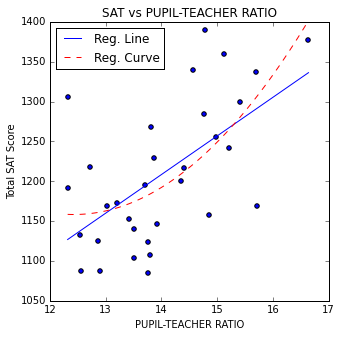

In [35]:
pl.figure(figsize=(5, 5))
pl.title('SAT vs PUPIL-TEACHER RATIO')
pl.xlabel('PUPIL-TEACHER RATIO')
pl.ylabel('Total SAT Score')
pl.scatter(Ratio_Dist,tot_score_ratio)
pl.plot(x2_dummy, predicted_model3, 'b', label="Reg. Line", linestyle='-')
pl.plot(x2_dummy,predicted_model4, 'r', linestyle='--', label = "Reg. Curve")
pl.legend(loc="upper left")
pl.xlim(int(lower2) , int(upper2+1))
pl.ylim(1050,1400)

After viewning the graph it is difficlut to judge which is a better fit, however it seems SAT scored greater than 1350 are outliers. So I try to find a better model by removing outliers 

In [36]:
#Setting X and Y variables
SAT_vs_RATIO_z3 = SAT_vs_RATIO [(SAT_vs_RATIO.Total_Score < 1350)]
len(SAT_vs_RATIO_z3)

29

In [37]:
Ratio_Dist_z3 = SAT_vs_RATIO_z3['SCHOOLWIDE PUPIL-TEACHER RATIO']
tot_score_ratio_z3 = SAT_vs_RATIO_z3['Total_Score']

# Generating 1-degree linear regression model 
model5 = smf.ols(formula='(tot_score_ratio_z3) ~ (Ratio_Dist_z3) ' , data= SAT_vs_RATIO_z3).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     tot_score_ratio_z3   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     7.492
Date:                Tue, 15 Dec 2015   Prob (F-statistic):             0.0108
Time:                        14:14:29   Log-Likelihood:                -162.58
No. Observations:                  29   AIC:                             329.2
Df Residuals:                      27   BIC:                             331.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       703.4040    178.625      3.938      0.001       336.896  1069.912
Ratio_Dist_z3    35.2287     12.871      2.737      0.011         8.820    61.638
==============================================================================
Omnibus:                        1.793   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.450
Skew:                           0.533   Prob(JB):                        0.484
Kurtosis:                       2.747   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Generating 2-degree linear regression model 
model6 = smf.ols(formula='(tot_score_ratio_z3) ~ (Ratio_Dist_z3) + I(Ratio_Dist_z3**2)' , data= SAT_vs_RATIO_z3).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     tot_score_ratio_z3   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     5.185
Date:                Tue, 15 Dec 2015   Prob (F-statistic):             0.0127
Time:                        14:14:35   Log-Likelihood:                -161.26
No. Observations:                  29   AIC:                             328.5
Df Residuals:                      26   BIC:                             332.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept              4523.5774   2436.848      1.856      0.075      -485.435  9532.590
Ratio_Dist_z3          -514.1142    349.751     -1.470      0.154     -1233.037   204.809
I(Ratio_Dist_z3 ** 2)    19.6491     12.502      1.572      0.128        -6.049    45.347
==============================================================================
Omnibus:                        0.545   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.505
Skew:                           0.287   Prob(JB):                        0.777
Kurtosis:                       2.704   Cond. No.                     3.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing outleirs the R-Squared values for 1st degree linear regression is 0.217 which is lower than the previous model (0.349), therefore removing outliers made the model worst. 

After removing outleirs the R-Squared values for 1st degree linear regression is 0.285 which is lower than the previous model (0.392), therefore removing outliers made the model worst. So I will not plot any visualization for these models. 

Now I am doing likehood ratio test on the 1st and 2nd degree model of SAT score vs. Pupil Teacher Ratio for dataset with outliers.

For likehood ratio test null hypothesis is that the linear model(Model 3) is a better fit than the curve model(Model 4)

In [39]:
#LIKELIHOOD RATIO TEST 
model4.compare_lr_test(model3)

(2.1730848175553774, 0.14044425869782795, 1.0)


Since the ratio I have gotten (2.17) is lower than the chi square value (3.84 for a significance level of 0.05) I can accept the null hypothesis. Therefore, Line model is better than curve model.

###PART 3
####Problem Statement: MULTIVARIATE ANALYSIS TO PREDICT HOW Attendance Rate and Pupil to Teacher Ratio affect  SAT Score
#####NULL HYPOTHESIS: SAT Scores of Students in NYC School District(1-32) has NO Correlation to Attendance Rate and Pupil to Teacher Ratio in NYC School District(1-32)
#####ALTERNATE HYPOTHESIS: SAT Scores of Students in NYC School District(1-32) has Correlation to Attendance Rate and Pupil to Teacher Ratio in NYC School District(1-32)

In [40]:
#MERGING THE DATA SETS FOR DOING MULTIVARIATE REGRESSION ANALYSIS
SAT_vs_MULTI = pd.merge(attendance_32, SAT_vs_RATIO, how='outer', on='District')
SAT_vs_MULTI['Ratio_Dist_Mul'] = SAT_vs_MULTI['SCHOOLWIDE PUPIL-TEACHER RATIO']
SAT_vs_MULTI.columns
SAT_vs_MULTI.info()
SAT_vs_MULTI.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 16 columns):
District                             32 non-null float64
YTD % Attendance (Avg)               32 non-null object
YTD Enrollment (Avg)                 32 non-null int64
class_attend                         32 non-null float64
Num_test_taker                       32 non-null float64
SAT_avg_reading                      32 non-null float64
SAT_avg_writing                      32 non-null float64
SAT_avg_math                         32 non-null float64
Total_Score                          32 non-null float64
NUMBER OF STUDENTS / SEATS FILLED    32 non-null float64
NUMBER OF SECTIONS                   32 non-null float64
AVERAGE CLASS SIZE                   32 non-null float64
SIZE OF SMALLEST CLASS               32 non-null float64
SIZE OF LARGEST CLASS                32 non-null float64
SCHOOLWIDE PUPIL-TEACHER RATIO       32 non-null float64
Ratio_Dist_Mul                       32 non-n

,District,YTD % Attendance (Avg),YTD Enrollment (Avg),class_attend,Num_test_taker,SAT_avg_reading,SAT_avg_writing,SAT_avg_math,Total_Score,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Ratio_Dist_Mul
0,1,91.18%,12367,91.18,73.333333,423.777778,413.555556,468.444444,1305.777778,57.533719,2.672447,20.774759,19.042389,22.418112,12.319355,12.319355
1,2,89.01%,60823,89.01,106.465517,424.068966,419.448276,441.344828,1284.862069,107.259830,4.220510,23.794368,20.898512,26.222104,14.770874,14.770874
2,3,89.28%,21962,89.28,108.769231,424.846154,417.076923,426.000000,1267.923077,84.129252,3.417687,22.614150,20.481633,24.519728,13.810638,13.810638


In [42]:
# #Setting X1, X2 and Y variables
# X1 = SAT_vs_MULTI['class_attend']
# X2 = SAT_vs_MULTI['SCHOOLWIDE PUPIL-TEACHER RATIO']
# Y = SAT_vs_MULTI['Total_Score']

# Generating 2-degree linear regression model
model7 = smf.ols(formula='(Total_Score) ~ (class_attend) + (Ratio_Dist_Mul)',
                 data= SAT_vs_MULTI).fit()
# model7 = smf.ols(formula='(tot_score_Mul) ~ (cls_atnd_mul) + (Ratio_Dist_Mul)',
#                  data= SAT_vs_MULTI).fit()
model7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Score   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     17.96
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           8.44e-06
Time:                        14:15:02   Log-Likelihood:                -176.15
No. Observations:                  32   AIC:                             358.3
Df Residuals:                      29   BIC:                             362.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -1429.4444    557.040     -2.566      0.016     -2568.718  -290.171
class_attend      26.3214      7.234      3.638      0.001        11.526    41.117
Ratio_Dist_Mul    19.1815     12.987      1.477      0.150        -7.380    45.743
==============================================================================
Omnibus:                        1.266   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                0.932
Skew:                           0.063   Prob(JB):                        0.627
Kurtosis:                       2.173   Cond. No.                     4.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

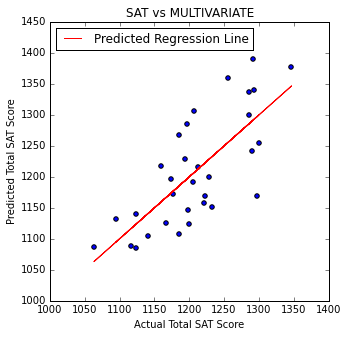

In [43]:
lmy = model7.predict(SAT_vs_MULTI)
pl.figure(figsize=(5, 5))
pl.title('SAT vs MULTIVARIATE')
pl.xlabel('Actual Total SAT Score')
pl.ylabel('Predicted Total SAT Score')
# pl.scatter(Ratio_Dist,tot_score_ratio)
pl.scatter(lmy,SAT_vs_MULTI['Total_Score'])
pl.plot(lmy, lmy, '-r', label = "Predicted Regression Line")
# pl.plot(x2_dummy, predicted_model3, 'b', label="1st Degree Regression Line", linestyle='-')
# pl.plot(x2_dummy,predicted_model4, 'r', linestyle='--', label = "2nd Degree Regression Curve")
pl.legend(loc="upper left")
# pl.xlim(int(lower2) , int(upper2+1))
# pl.ylim(1050,1400)

In [44]:
print "R-squared value for BEST Model for SAT vs Attendance is:", model1.rsquared
print "R-squared value for BEST Model for SAT vs Pupil-Teacher Ratio is:", model3.rsquared
print "R-squared value for BEST Model for SAT vs Multiple Varibale is:", model7.rsquared

R-squared value for BEST Model for SAT vs Attendance is: 0.519632282357
R-squared value for BEST Model for SAT vs Pupil-Teacher Ratio is: 0.349291000308
R-squared value for BEST Model for SAT vs Multiple Varibale is: 0.553238341215


Comparing the R values for single varible models with multivariable model , it is evident that the Multivatiate model is the has the highest R-value and hence is the Best fit model. 

Also from the statistics summary we can observe Class attendance has a stronger infuence on SAT Score than Pupil teacher Ratio. 